<a href="https://colab.research.google.com/github/CSC345DSLoveYou/HousePrice_DSLoveyou/blob/master/HousePrices_dataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# If you want to save the file, this ipynb file will save on the **CSC345-DS-Project shared drive** when you write the code that here.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
pip install --upgrade pingouin

Requirement already up-to-date: pingouin in /usr/local/lib/python3.6/dist-packages (0.3.8)


In [ ]:
import seaborn as sns


In [ ]:
print(pd.__version__)

1.1.3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dfTrain = pd.read_csv("/content/drive/Shared drives/CSC345-DS-Project/house-prices-advanced-regression-techniques/train.csv"
        , sep = ",")
print('%i subjects and %i columns' % dfTrain.shape)
dfTrain.head()


1460 subjects and 81 columns


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
dfTest = pd.read_csv("/content/drive/Shared drives/CSC345-DS-Project/house-prices-advanced-regression-techniques/test.csv"
        , sep = ",")
print('%i subjects and %i columns' % dfTest.shape)

dfTest.head()

1459 subjects and 80 columns


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
dfSample = pd.read_csv("/content/drive/Shared drives/CSC345-DS-Project/house-prices-advanced-regression-techniques/sample_submission.csv"
        , sep = ",")
print('%i subjects and %i columns' % dfSample.shape)

dfSample.head()

1459 subjects and 2 columns


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [ ]:
#The relation of YearBuilt and GarageArea 1
import pingouin as pg
pg.corr(x=dfTrain['YearBuilt'], y=dfTrain['GarageArea'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,1460,0.478954,"[0.44, 0.52]",0.229397,0.228339,1.375227e-84,8.003e+80,1.0


In [ ]:
#The relation of OverallQual and SalePrice 2
import pingouin as pg
pg.corr(x=dfTrain['OverallQual'], y=dfTrain['SalePrice'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,1460,0.790982,"[0.77, 0.81]",0.625652,0.625138,2.185675e-313,inf,1.0


In [ ]:
#The relation of GrLivArea and SalePrice 3
import pingouin as pg
pg.corr(x=dfTrain['GrLivArea'], y=dfTrain['SalePrice'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,1460,0.708624,"[0.68, 0.73]",0.502149,0.501465,4.518034e-223,1.066e+219,1.0


In [ ]:
import plotly.express as px
fig = px.scatter(dfTrain, x="YearBuilt", y="GarageArea")
fig.show()

#1

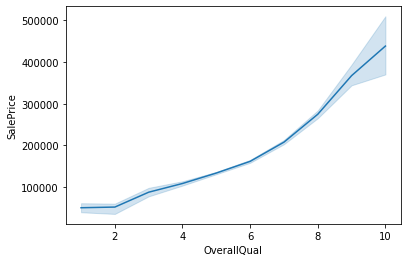

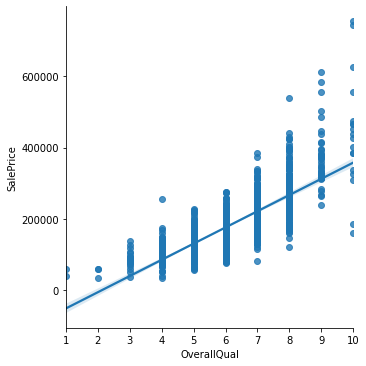

In [ ]:
data = pd.concat([dfTrain['SalePrice'], dfTrain['OverallQual'],dfTrain['MSSubClass']], axis=1)
sns.lineplot(x = "OverallQual", y = "SalePrice",data=data,palette="viridis")
sns.lmplot(x="OverallQual",y="SalePrice", data=data);
plt.show()
#2

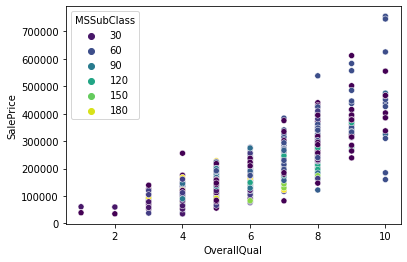

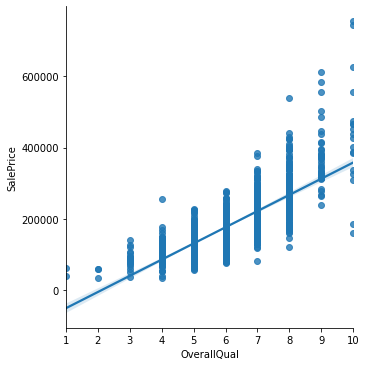

In [ ]:
data = pd.concat([dfTrain['SalePrice'], dfTrain['OverallQual'],dfTrain['MSSubClass']], axis=1)
sns.scatterplot(x = "OverallQual", y = "SalePrice",data=data, hue= 'MSSubClass',palette="viridis")
sns.lmplot(x="OverallQual",y="SalePrice", data=data);
plt.show()

#2

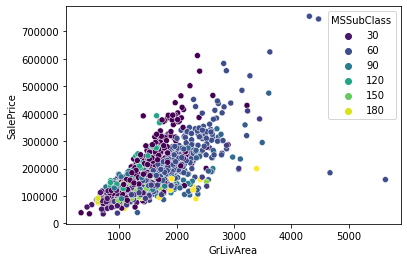

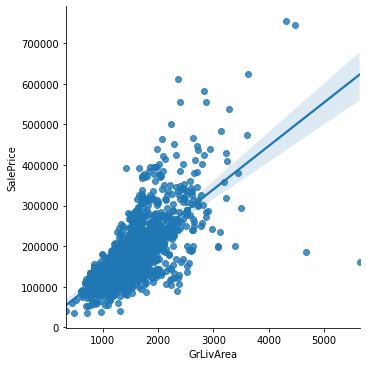

In [ ]:
data = pd.concat([dfTrain['GrLivArea'], dfTrain['SalePrice'],dfTrain['MSSubClass']], axis=1)
sns.scatterplot(x = "GrLivArea", y = "SalePrice",data=data, hue= 'MSSubClass',palette="viridis")
sns.lmplot(x="GrLivArea",y="SalePrice", data=data);
plt.show()
#3

In [ ]:
import plotly.express as px
fig = px.histogram(dfTrain, x="YrSold")
fig.show()

In [ ]:
import plotly.express as px
fig = px.bar(dfTrain, x="MSSubClass", y="SalePrice")
fig.show()


In [ ]:
dfTrain.corr().round(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.00,0.01,-0.01,-0.03,-0.03,0.01,-0.01,-0.02,-0.05,-0.01,-0.01,-0.01,-0.02,0.01,0.01,-0.04,0.01,0.00,-0.02,0.01,0.01,0.04,0.00,0.03,-0.02,0.00,0.02,0.02,-0.03,-0.00,0.00,-0.05,0.00,0.06,-0.01,0.02,0.00,-0.02
MSSubClass,0.01,1.00,-0.39,-0.14,0.03,-0.06,0.03,0.04,0.02,-0.07,-0.07,-0.14,-0.24,-0.25,0.31,0.05,0.07,0.00,-0.00,0.13,0.18,-0.02,0.28,0.04,-0.05,0.09,-0.04,-0.10,-0.01,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,-0.01,-0.02,-0.08
LotFrontage,-0.01,-0.39,1.00,0.43,0.25,-0.06,0.12,0.09,0.19,0.23,0.05,0.13,0.39,0.46,0.08,0.04,0.40,0.10,-0.01,0.20,0.05,0.26,-0.01,0.35,0.27,0.07,0.29,0.34,0.09,0.15,0.01,0.07,0.04,0.21,0.00,0.01,0.01,0.35
LotArea,-0.03,-0.14,0.43,1.00,0.11,-0.01,0.01,0.01,0.10,0.21,0.11,-0.00,0.26,0.30,0.05,0.00,0.26,0.16,0.05,0.13,0.01,0.12,-0.02,0.19,0.27,-0.02,0.15,0.18,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01,0.26
OverallQual,-0.03,0.03,0.25,0.11,1.00,-0.09,0.57,0.55,0.41,0.24,-0.06,0.31,0.54,0.48,0.30,-0.03,0.59,0.11,-0.04,0.55,0.27,0.10,-0.18,0.43,0.40,0.55,0.60,0.56,0.24,0.31,-0.11,0.03,0.06,0.07,-0.03,0.07,-0.03,0.79
OverallCond,0.01,-0.06,-0.06,-0.01,-0.09,1.00,-0.38,0.07,-0.13,-0.05,0.04,-0.14,-0.17,-0.14,0.03,0.03,-0.08,-0.05,0.12,-0.19,-0.06,0.01,-0.09,-0.06,-0.02,-0.32,-0.19,-0.15,-0.00,-0.03,0.07,0.03,0.05,-0.00,0.07,-0.00,0.04,-0.08
YearBuilt,-0.01,0.03,0.12,0.01,0.57,-0.38,1.00,0.59,0.32,0.25,-0.05,0.15,0.39,0.28,0.01,-0.18,0.20,0.19,-0.04,0.47,0.24,-0.07,-0.17,0.10,0.15,0.83,0.54,0.48,0.22,0.19,-0.39,0.03,-0.05,0.00,-0.03,0.01,-0.01,0.52
YearRemodAdd,-0.02,0.04,0.09,0.01,0.55,0.07,0.59,1.00,0.18,0.13,-0.07,0.18,0.29,0.24,0.14,-0.06,0.29,0.12,-0.01,0.44,0.18,-0.04,-0.15,0.19,0.11,0.64,0.42,0.37,0.21,0.23,-0.19,0.05,-0.04,0.01,-0.01,0.02,0.04,0.51
MasVnrArea,-0.05,0.02,0.19,0.10,0.41,-0.13,0.32,0.18,1.00,0.26,-0.07,0.11,0.36,0.34,0.17,-0.07,0.39,0.09,0.03,0.28,0.20,0.10,-0.04,0.28,0.25,0.25,0.36,0.37,0.16,0.13,-0.11,0.02,0.06,0.01,-0.03,-0.01,-0.01,0.48
BsmtFinSF1,-0.01,-0.07,0.23,0.21,0.24,-0.05,0.25,0.13,0.26,1.00,-0.05,-0.50,0.52,0.45,-0.14,-0.06,0.21,0.65,0.07,0.06,0.00,-0.11,-0.08,0.04,0.26,0.15,0.22,0.30,0.20,0.11,-0.10,0.03,0.06,0.14,0.00,-0.02,0.01,0.39


Text(0.5, 1.0, 'Correlation matrix')

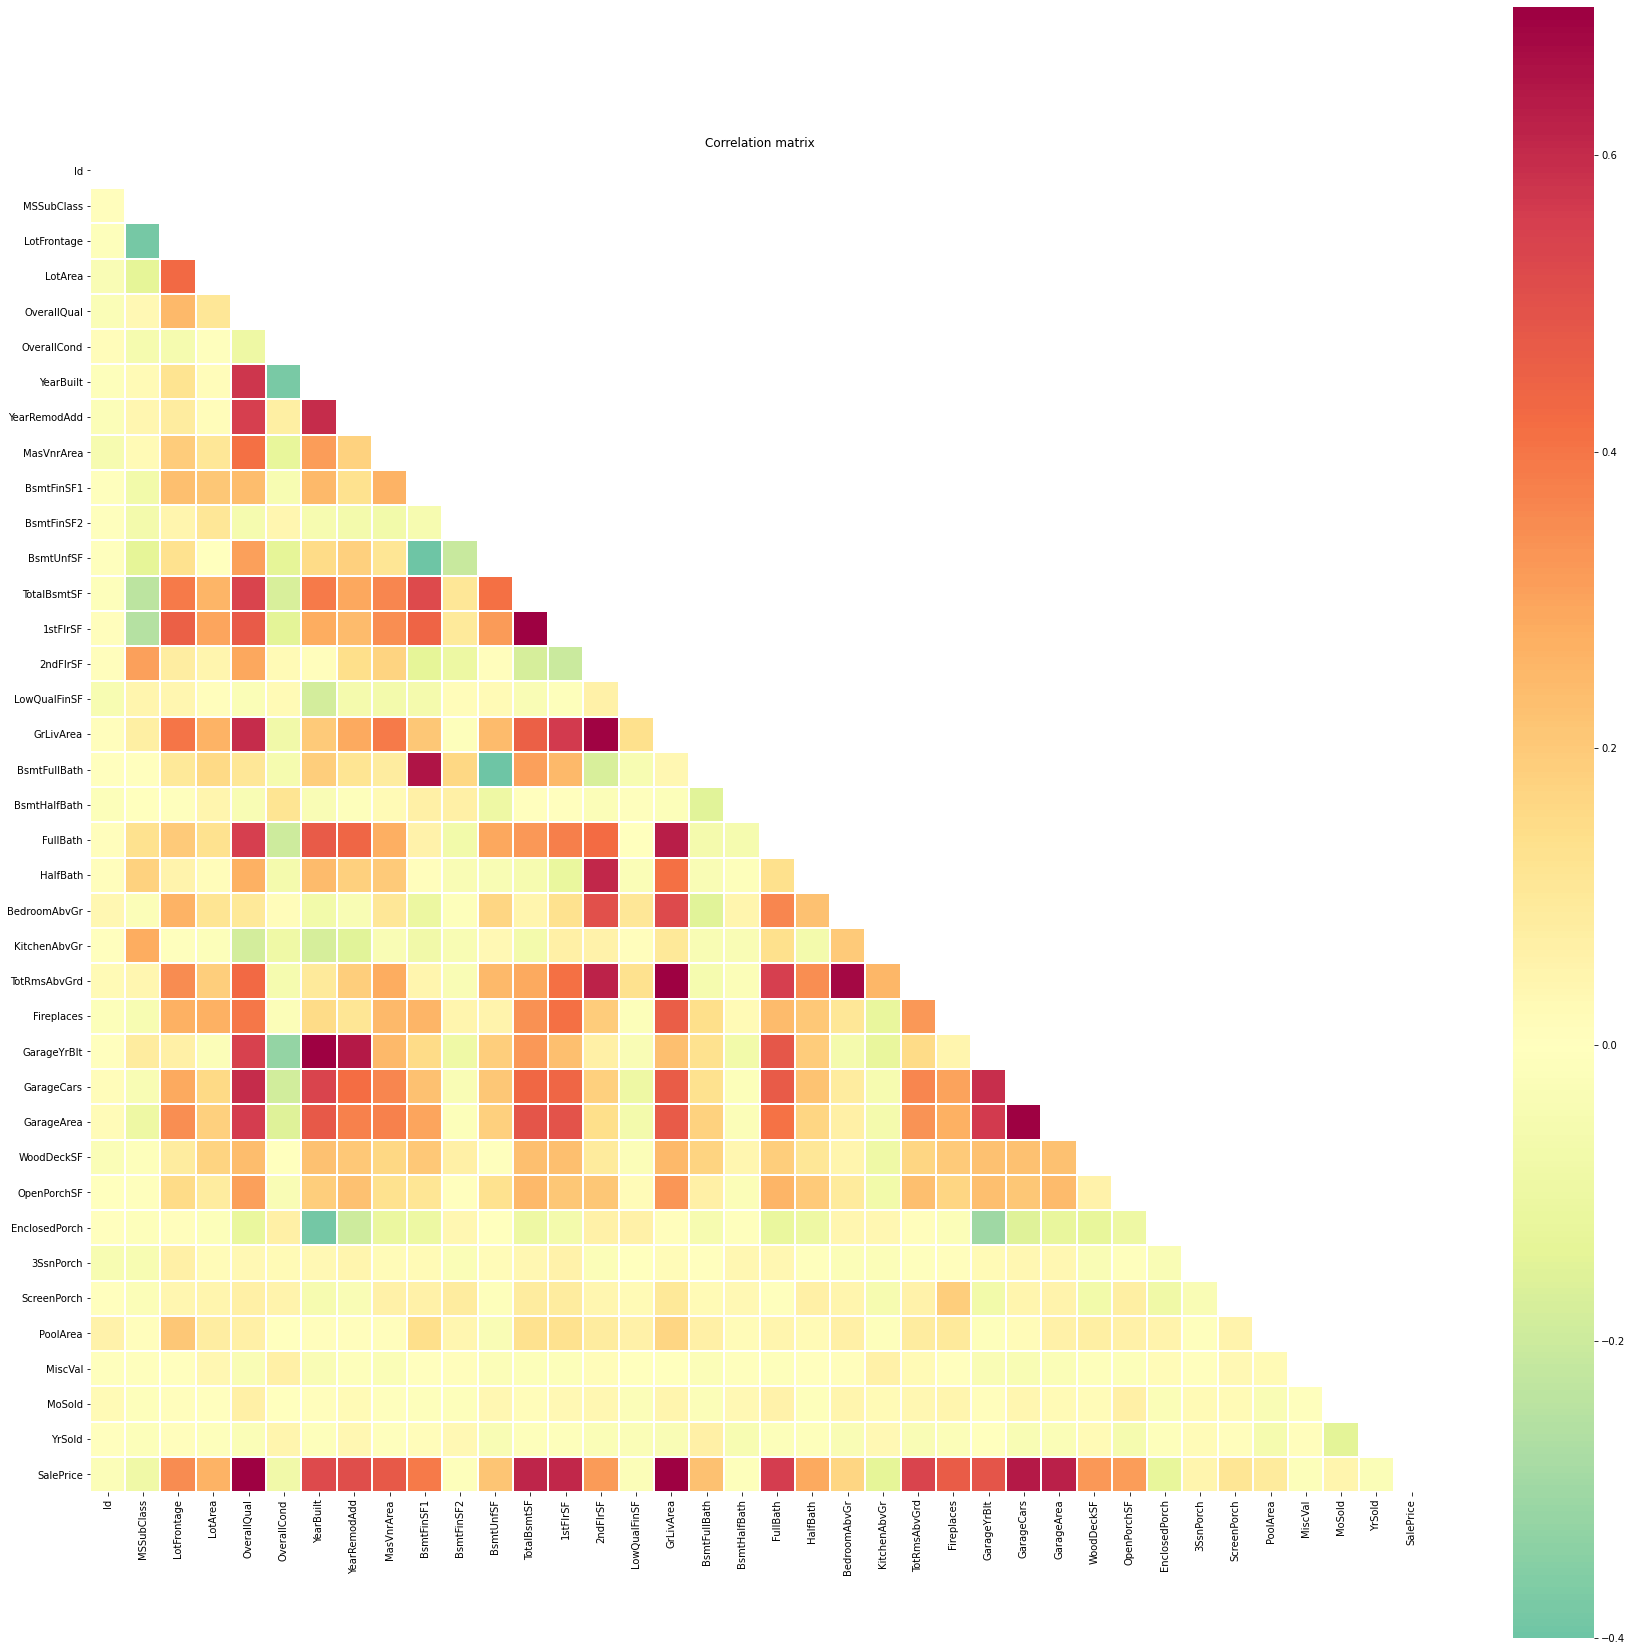

In [ ]:
corrs = dfTrain.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30,30))
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.7, linewidths=1,center= 0)
plt.title('Correlation matrix')

In [ ]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

In [ ]:
# The size of the train and test data:

print("Size of the train data: ", dfTrain.shape)
print("Size of the test data: ", dfTest.shape)

Size of the train data:  (1460, 81)
Size of the test data:  (1459, 80)


In [ ]:
dfTrain.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
dfTrain.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# Let us see the columns that contain NaNs
def missing_values():
    temp_dict = dict()
    for i in dfTrain.columns:
        if dfTrain[i].isnull().sum() > 0: 
            temp_dict[i] = dfTrain[i].isnull().sum()
    return temp_dict
            
# missing features and number of NaN in the features 

#missing_values()

# Few columns/decorations have more than 50% of the data points missing, we will discard those columns.
# uncomment the missing_values() functions called above to look them in detail.

In [ ]:
# Deleting the columns which has more than 50% of the missing values

def delete_columns(col):
    if dfTrain[col].isnull().sum() > dfTrain[col].count()/2:
        del dfTrain[col]

for col in dfTrain.columns:
    delete_columns(col)

# let us now look at the columns that still have missing values/NaNs
missing_values()

{'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'BsmtQual': 37,
 'Electrical': 1,
 'GarageCond': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'LotFrontage': 259,
 'MasVnrArea': 8,
 'MasVnrType': 8}

In [ ]:
# This function predicts the LotFrontage of the missing data values using a Linear Regression model 
# Build a linear regression model with known LotArea and LotFrontage and predicts the LotFrontage for 
# the data with missing values

def fillna_lotfrontage(X_train, y_train):

    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    
    return reg.coef_.tolist()[0], reg.intercept_ 

In [ ]:
X_train_list = dfTrain['LotArea'].dropna()[:1000]
X_train = [[X_train_list[i]] for i in range(len(X_train_list))]
y_train = dfTrain['LotFrontage'].dropna()[:1000]

w, intercept = fillna_lotfrontage(X_train, y_train)

for i in range(len(dfTrain["LotFrontage"])):
    if pd.isnull(dfTrain.loc[i, "LotFrontage"]):
        dfTrain.loc[i, "LotFrontage"] = dfTrain.loc[i, "LotArea"]*w + intercept

In [ ]:
# No NaN values in the LotFrontage column left
dfTrain["LotFrontage"].isnull().sum()

0

In [ ]:
dfTrain = pd.DataFrame(dfTrain)
dfTrain.head(n=5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
# Let us see the distribution of "MasVnrType" in the data
dfTrain["MasVnrType"].describe()

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

In [ ]:
for i in range(len(dfTrain["MasVnrType"])):  
    if pd.isnull(dfTrain.loc[i, "MasVnrType"]) and pd.isnull(dfTrain.loc[i, "MasVnrArea"]):
        dfTrain.loc[i, "MasVnrType"] = "None"
        dfTrain.loc[i, "MasVnrArea"] = 0
        
# NaNs values in both MasVnrType and MasVnrArea are now removed
dfTrain["MasVnrType"].isnull().sum(), dfTrain["MasVnrArea"].isnull().sum()

(0, 0)

In [ ]:
 # Let us see the type distribution.
dfTrain["BsmtQual"].describe()
# it seems "TA" repeats most for alomost fifty percent of the data
#  there are four possible options

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

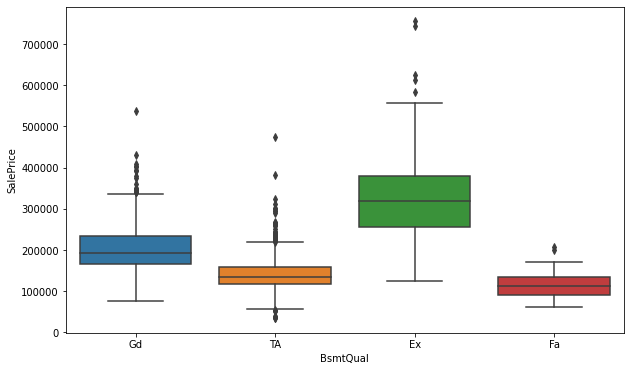

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="BsmtQual", y="SalePrice", data=dfTrain)

In [ ]:
# List of the 'BsmtQual' types (four types from the above boxplot)

pd.DataFrame(dfTrain["BsmtQual"].unique()).dropna()[0].tolist()

['Gd', 'TA', 'Ex', 'Fa']

In [ ]:
# Replacing the NaNs based on the above boxplot: SalePrice and BsmtQual distribution

for i in range(len(dfTrain["BsmtQual"])):  
    if pd.isnull(dfTrain.loc[i, "BsmtQual"]):
        
        sale_price = dfTrain.loc[i, "SalePrice"]
        
        if 0 < sale_price < 125000:
            dfTrain.loc[i, "BsmtQual"] = 'Fa'
        
        elif 125000 < sale_price < 170000:
            dfTrain.loc[i, "BsmtQual"] = 'TA'
        
        elif 170000 < sale_price < 255000:
            dfTrain.loc[i, "BsmtQual"] = 'Gd'
            
        elif sale_price > 255000:
            dfTrain.loc[i, "BsmtQual"] = 'Ex'
        
# NaNs values in both BsmtQual and MasVnrArea are now removed
dfTrain["BsmtQual"].isnull().sum()

0

In [ ]:
dfTrain = pd.DataFrame(dfTrain)
dfTrain.head(n=5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
# The other columns related with BsmtQual don't have much clear impact on the SalePrice
# Taking the most important variable on the category into consideration, we drop the other
# related columns: 'BsmtExposure',  'BsmtFinType1', 'BsmtFinType2', 'BsmtCond'.

delete_columns = ['BsmtExposure',  'BsmtFinType1', 'BsmtFinType2', 'BsmtCond']
for col in delete_columns:
    del dfTrain[col]

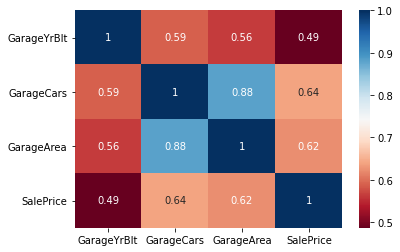

In [ ]:
garage_columns = ['GarageType', 'GarageYrBlt', 'GarageFinish','GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', \
                  'SalePrice']
# Let us plot heatplot diagrams to see the correlation of the above variables on the SalePrice
sns.heatmap(dfTrain[garage_columns].corr(), annot=True, cmap="RdBu")

In [ ]:
# Since GarageCars doesn't have any missing values(NaN), we don't have to replace any NaN values here.
# We simply delete the columns that are not important and will not consider ahead for further study.

garage_columns.remove('GarageCars')
garage_columns.remove('SalePrice')
for col in garage_columns:
    # deleting the columns except those two in the garage_columns list we consider 
    del dfTrain[col]

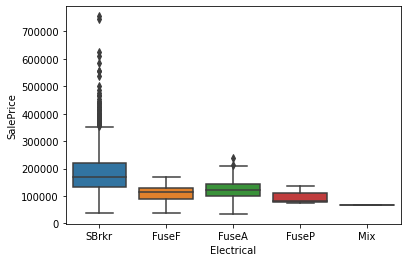

In [ ]:
# We have one value NaN in the column 'Electrical'
# Let us see its importance: relation with SalePrice

sns.boxplot(x='Electrical', y='SalePrice', data=dfTrain)

In [ ]:

dfTrain['Electrical'].unique()


array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [ ]:
for i in range(len(dfTrain['Electrical'])):
    if pd.isnull(dfTrain.loc[i, 'Electrical']):
        # print(df_train.loc[i, 'SalePrice'])
        # Checked the value of SalePrice corresponding to the missing Electrical value
        # and the missing value is imputed looking at the above graph
        dfTrain.loc[i, 'Electrical'] = 'SBrkr'
# No NaN left in 'Electrical' column now
dfTrain['Electrical'].isnull().sum()

0

In [ ]:
dfTrain.columns, dfTrain.columns.shape[0]


(Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
        'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtFinSF1',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
        'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
        'Functional', 'Fireplaces', 'GarageCars', 'PavedDrive', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
        'SalePri

In [ ]:
# separating categorical and numerical variables

variables_list = dfTrain.columns.tolist()
numerical_vars = []
for col in variables_list:
    try:
        if float(dfTrain[col][1]).is_integer():
            numerical_vars.append(col)
    except ValueError: pass

catergorical_vars = set(variables_list) - set(numerical_vars)
#catergorical_vars

# Let us see number of each type of columns/decorations
len(catergorical_vars), len(numerical_vars)

(30, 36)

<Figure size 1008x720 with 0 Axes>

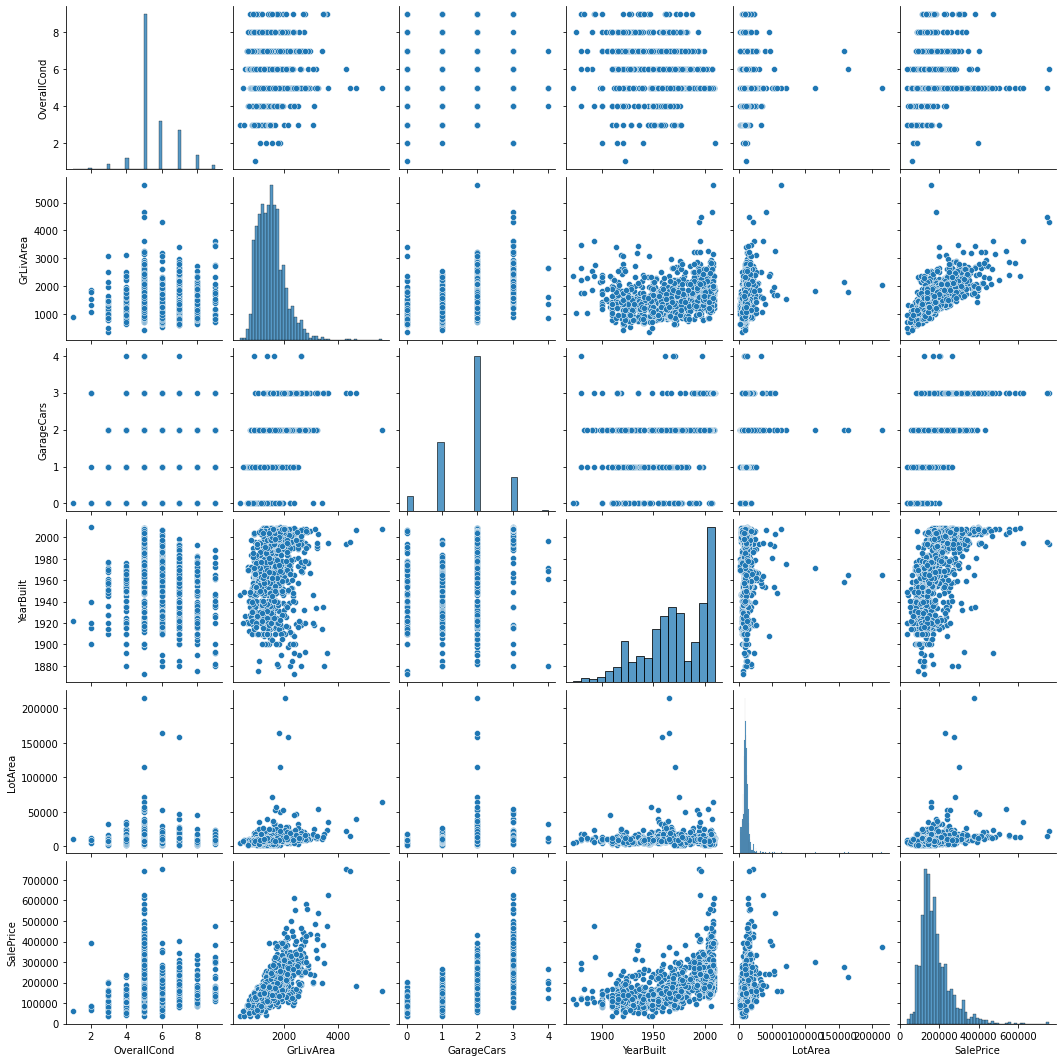

In [ ]:
interesting_cols = ["OverallCond", "GrLivArea", "GarageCars", "YearBuilt", "LotArea", "SalePrice"]

plt.figure(figsize=(14,10))
sns.pairplot(dfTrain[interesting_cols], dropna=True)
plt.show()
del interesting_cols

In [ ]:
correlation_matrix = dfTrain.drop(["Id"], axis=1).corr()
#plt.figure(figsize=(12,8))
#sns.heatmap(corr_mat, square=False)
#del corr_mat

In [ ]:
correlation_matrix = dfTrain.drop(["Id"], axis=1).corr()
#plt.figure(figsize=(12,8))
#sns.heatmap(corr_mat, square=False)
#del corr_mat

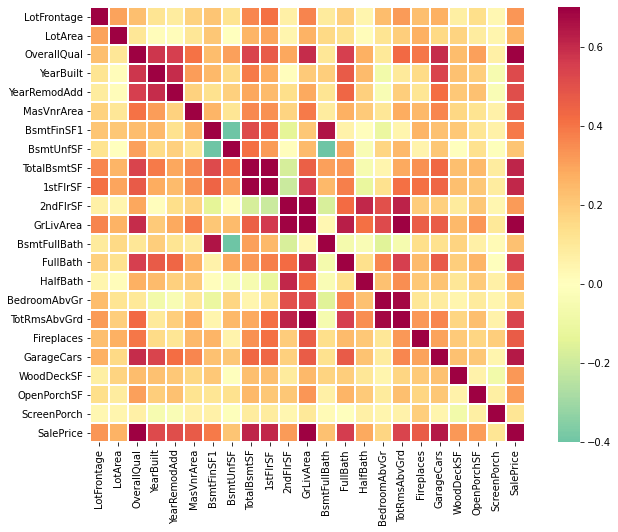

In [ ]:
# Let us find out the variable names that have high correlation with SalePrice
# We call these variables important variables.

variables = correlation_matrix.columns
important_variables = []
for row in variables:
    corrl = correlation_matrix.loc[row, 'SalePrice']
    if corrl > 0.1:
        important_variables.append(row)

hp = correlation_matrix.loc[important_variables, important_variables]
plt.figure("Heatmap-Important Variables", figsize=(12,8))
# sns.heatmap(hp, annot=True, cbar=True)

sns.heatmap(hp, cmap='Spectral_r', square=True, vmin=-.4, vmax=.7, linewidths=1,center= 0)


In [ ]:
# deleting these columns from the dataframe
for col in ['TotRmsAbvGrd', 'BsmtFinSF1', 'BsmtUnfSF', 'ScreenPorch', 'HalfBath']:
    del dfTrain[col]

In [ ]:
num_variables = set(numerical_vars) - set(['Id', 'TotRmsAbvGrd', 'BsmtFinSF1', 'BsmtUnfSF', 'ScreenPorch', 'HalfBath'])


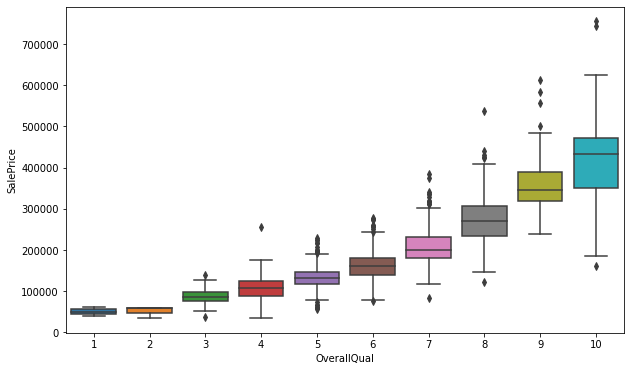

In [ ]:
# Boxplot

plt.figure(figsize=(10,6))
sns.boxplot(x="OverallQual", y="SalePrice", data=dfTrain)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



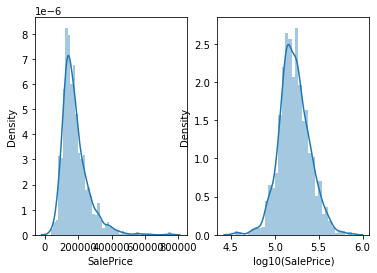

In [ ]:
# Data Normalaization
# Normalizing the right skewed SalePrice

fig, ax =plt.subplots(1,2)
sns.distplot(dfTrain['SalePrice'], ax=ax[0])
sns.distplot(np.log10(dfTrain['SalePrice']), ax=ax[1])
plt.xlabel('log10(SalePrice)')
fig.show()

In [ ]:
dfTrain.loc[:, 'SalePrice'] = np.round(np.log10(dfTrain['SalePrice']), 3)

In [ ]:
# The house price is in logarithmic scale now
dfTrain['SalePrice'].head()

0    5.319
1    5.259
2    5.349
3    5.146
4    5.398
Name: SalePrice, dtype: float64

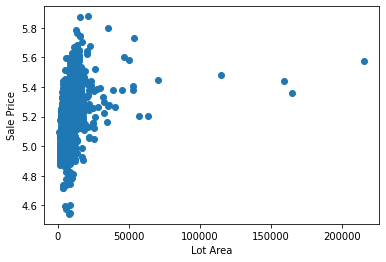

In [ ]:
# Plottng the LotArea - SalePrice graph

plt.scatter(dfTrain["LotArea"], dfTrain["SalePrice"])
plt.xlabel("Lot Area")
plt.ylabel("Sale Price")
plt.show()

In [ ]:
dfTrain['LotArea'].shape[0]

1460

In [ ]:
# the four point's indices (we drop four rows with index names in following list)
drop_index_list = dfTrain[dfTrain['LotArea'] > 100000].index.tolist()
dfTrain.drop(drop_index_list, inplace=True)
print("avoiding the above dataframe printing")

avoiding the above dataframe printing


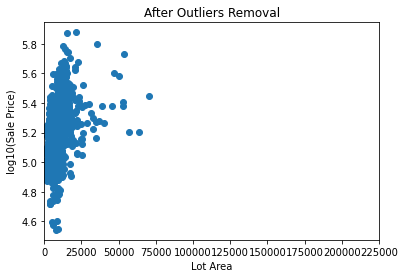

In [ ]:
# Again plottng the LotArea - SalePrice graph after the outlier removal

plt.scatter(dfTrain["LotArea"], dfTrain["SalePrice"])
plt.title("After Outliers Removal")
plt.xlabel("Lot Area")
plt.ylabel("log10(Sale Price)")
plt.xlim(0, 225000)
plt.show()

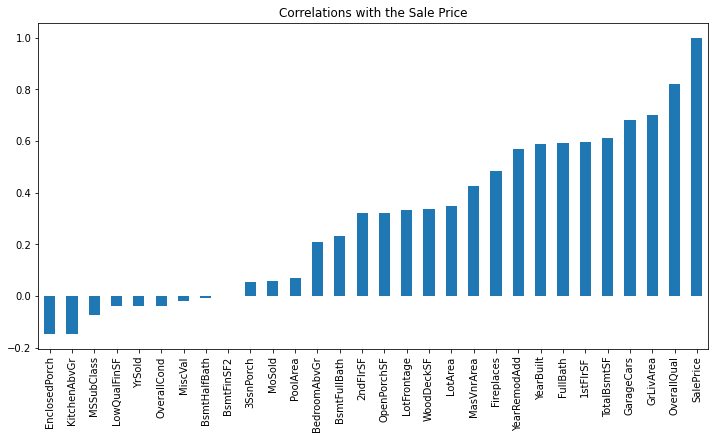

In [ ]:
corr_with_SalePrice = dfTrain.drop(["Id"], axis=1).corr()
plot_data = corr_with_SalePrice["SalePrice"].sort_values(ascending=True)
plt.figure(figsize=(12,6))
plot_data.plot.bar()
plt.title("Correlations with the Sale Price")
plt.show()
del plot_data

In [ ]:
# creating list of the final numerical columns we are going to consider for the prediction model
num_vars_list = []
for var in num_variables:
    num_vars_list.append(var)

print("Total numerical columns we finally have is: ", len(num_vars_list))

Total numerical columns we finally have is:  30


In [ ]:
categorical_list = list()
for i in catergorical_vars:
    categorical_list.append(i)
# Let us see all the possible categories in all of the categorical variables
for col in categorical_list:
    print(col, ": ", dfTrain[col].unique())

Exterior1st :  ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
CentralAir :  ['Y' 'N']
HeatingQC :  ['Ex' 'Gd' 'TA' 'Fa' 'Po']
Utilities :  ['AllPub' 'NoSeWa']
SaleCondition :  ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']
KitchenQual :  ['Gd' 'TA' 'Ex' 'Fa']
ExterCond :  ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Condition1 :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
LotConfig :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Condition2 :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Street :  ['Pave' 'Grvl']
Foundation :  ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
Heating :  ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
LandSlope :  ['Gtl' 'Mod' 'Sev']
Neighborhood :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' '

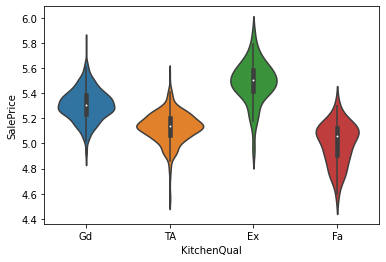

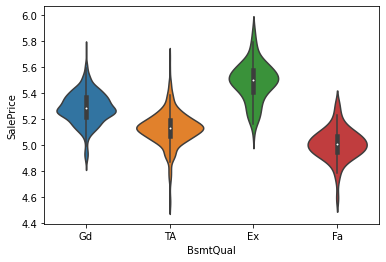

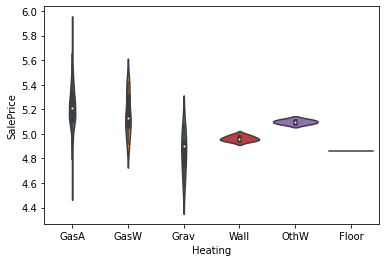

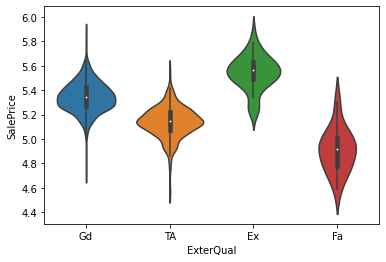

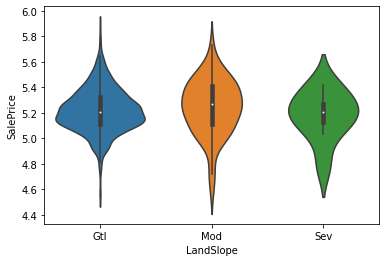

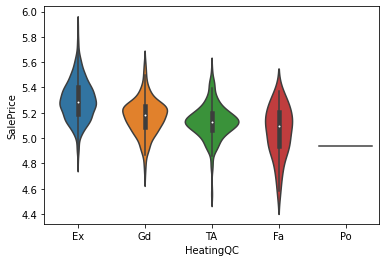

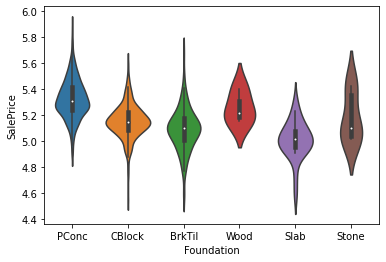

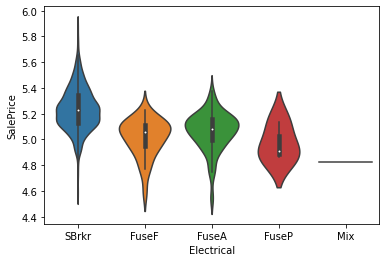

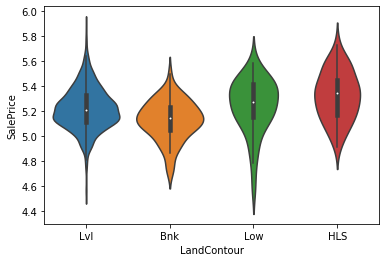

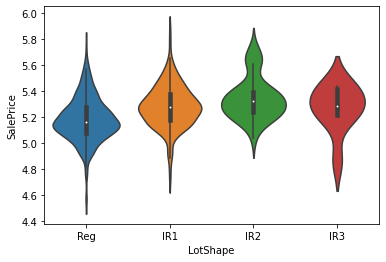

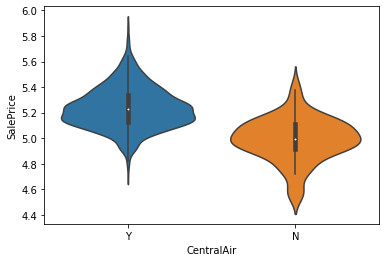

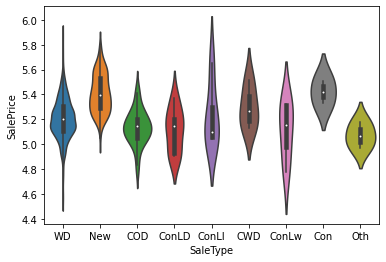

In [ ]:
# violinplot: for all columns/decorations in the categorical column list

few_cat_variables = ['KitchenQual', 'BsmtQual', 'Heating', 'ExterQual', 'LandSlope', 'HeatingQC', 'Foundation', 'Electrical', \
                     'LandContour', 'LotShape', 'CentralAir', 'SaleType']
# categorical_list => plotted all the variables in this list before showing only few of them in the above list
for i in range(len(few_cat_variables)):
    sns.violinplot(x=few_cat_variables[i], y='SalePrice', data=dfTrain)
    plt.show()

In [ ]:
important_categorical_vars = ['KitchenQual', 'BsmtQual', 'Heating', 'ExterQual']

# Let us once again categories of these important variables
for col in important_categorical_vars:
    print(col, ": ", dfTrain[col].unique())

KitchenQual :  ['Gd' 'TA' 'Ex' 'Fa']
BsmtQual :  ['Gd' 'TA' 'Ex' 'Fa']
Heating :  ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
ExterQual :  ['Gd' 'TA' 'Ex' 'Fa']


In [ ]:
# dataframe now contains only the numerical variables
all_vars_now = num_vars_list + important_categorical_vars
# The df_train ahead contains only these - all_vars_now variables
dfTrain = dfTrain[all_vars_now]

In [ ]:
# This function takes in the categorical variables and introduces the numerical variable columns for 
# each of the categories for that categorical variables/columns/decorations in the original data
# For each of original categorical columns - will be added separate columns in df_frame for each of the categories
def numerical_columns(cat_var):
    # new DataFrame for the categorical variable cat_var
    df = pd.get_dummies(dfTrain[cat_var], dummy_na=None)
    df_vars = df.columns
    modified_vars = [(cat_var + "-" + i) for i in df_vars]
    # new columns added in df_frame for each of the categories in cat_var
    for i in range(len(modified_vars)):
        dfTrain[modified_vars[i]] = pd.Series(df[df_vars[i]]).tolist()
    # making the modified_vars list empty for next cat_var
    modified_vars = []

In [ ]:
# Calling numerical_columns function to intoduce new categorical columns as numerical values

for cat_var in important_categorical_vars:
    numerical_columns(cat_var)
# Run only once

In [ ]:
# Now deleting the original categorical form of the variables converted into the numerical form
for var in important_categorical_vars:
    del dfTrain[var]

In [ ]:
# The dataframe we now have is ready to use in the regression model 
# we finally have 48 columns in the dataframe
dfTrain.tail()
# Ready to build regression model now

,SalePrice,BedroomAbvGr,FullBath,EnclosedPorch,YearBuilt,MSSubClass,LotFrontage,PoolArea,KitchenAbvGr,Fireplaces,3SsnPorch,YrSold,LotArea,OverallCond,MiscVal,TotalBsmtSF,YearRemodAdd,OverallQual,2ndFlrSF,BsmtHalfBath,MoSold,BsmtFinSF2,GarageCars,MasVnrArea,GrLivArea,LowQualFinSF,1stFlrSF,BsmtFullBath,WoodDeckSF,OpenPorchSF,KitchenQual-Ex,KitchenQual-Fa,KitchenQual-Gd,KitchenQual-TA,BsmtQual-Ex,BsmtQual-Fa,BsmtQual-Gd,BsmtQual-TA,Heating-Floor,Heating-GasA,Heating-GasW,Heating-Grav,Heating-OthW,Heating-Wall,ExterQual-Ex,ExterQual-Fa,ExterQual-Gd,ExterQual-TA
1455,5.243,3,2,0,1999,60,62.0,0,1,1,0,2007,7917,5,0,953,2000,6,694,0,8,0,2,0.0,1647,0,953,0,0,40,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1456,5.322,3,2,0,1978,20,85.0,0,1,2,0,2010,13175,6,0,1542,1988,6,0,0,2,163,2,119.0,2073,0,2073,1,349,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1457,5.426,4,2,0,1941,70,66.0,0,1,2,0,2010,9042,9,2500,1152,2006,7,1152,0,5,0,1,0.0,2340,0,1188,0,0,60,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
1458,5.153,2,1,112,1950,20,68.0,0,1,0,0,2010,9717,6,0,1078,1996,5,0,0,4,1029,1,0.0,1078,0,1078,1,366,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1459,5.169,3,1,0,1965,20,75.0,0,1,0,0,2008,9937,6,0,1256,1965,5,0,0,6,290,1,0.0,1256,0,1256,1,736,68,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0


In [ ]:
# Importing sklearn methods
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

In [ ]:
# reassigning the final DataFrame from analysis above as df
df = dfTrain
df.columns

Index(['SalePrice', 'BedroomAbvGr', 'FullBath', 'EnclosedPorch', 'YearBuilt',
       'MSSubClass', 'LotFrontage', 'PoolArea', 'KitchenAbvGr', 'Fireplaces',
       '3SsnPorch', 'YrSold', 'LotArea', 'OverallCond', 'MiscVal',
       'TotalBsmtSF', 'YearRemodAdd', 'OverallQual', '2ndFlrSF',
       'BsmtHalfBath', 'MoSold', 'BsmtFinSF2', 'GarageCars', 'MasVnrArea',
       'GrLivArea', 'LowQualFinSF', '1stFlrSF', 'BsmtFullBath', 'WoodDeckSF',
       'OpenPorchSF', 'KitchenQual-Ex', 'KitchenQual-Fa', 'KitchenQual-Gd',
       'KitchenQual-TA', 'BsmtQual-Ex', 'BsmtQual-Fa', 'BsmtQual-Gd',
       'BsmtQual-TA', 'Heating-Floor', 'Heating-GasA', 'Heating-GasW',
       'Heating-Grav', 'Heating-OthW', 'Heating-Wall', 'ExterQual-Ex',
       'ExterQual-Fa', 'ExterQual-Gd', 'ExterQual-TA'],
      dtype='object')

In [ ]:
# Separating 'SalePrice' column

X_columns = df.columns.tolist()
X_columns.remove('SalePrice')
print(X_columns)

In [ ]:
# The input data for the regression models are:

X = df[X_columns]
y = df['SalePrice']

In [ ]:
# The input data: dividing into train (75%) and validation data (25%)

x_train_len = round(X.shape[0]*0.75)
x_train = X[:x_train_len]
x_validation = X[x_train_len:]
y_train = y[:x_train_len]
y_validation = y[x_train_len:]

# print Test and Validation data lenght
print("Train data points: ", x_train_len)
print("Validation data points: ", x_validation.shape[0])


Train data points:  1092
Validation data points:  364


In [ ]:
x_train.head()


,BedroomAbvGr,FullBath,EnclosedPorch,YearBuilt,MSSubClass,LotFrontage,PoolArea,KitchenAbvGr,Fireplaces,3SsnPorch,YrSold,LotArea,OverallCond,MiscVal,TotalBsmtSF,YearRemodAdd,OverallQual,2ndFlrSF,BsmtHalfBath,MoSold,BsmtFinSF2,GarageCars,MasVnrArea,GrLivArea,LowQualFinSF,1stFlrSF,BsmtFullBath,WoodDeckSF,OpenPorchSF,KitchenQual-Ex,KitchenQual-Fa,KitchenQual-Gd,KitchenQual-TA,BsmtQual-Ex,BsmtQual-Fa,BsmtQual-Gd,BsmtQual-TA,Heating-Floor,Heating-GasA,Heating-GasW,Heating-Grav,Heating-OthW,Heating-Wall,ExterQual-Ex,ExterQual-Fa,ExterQual-Gd,ExterQual-TA
0,3,2,0,2003,60,65.0,0,1,0,0,2008,8450,5,0,856,2003,7,854,0,2,0,2,196.0,1710,0,856,1,0,61,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,3,2,0,1976,20,80.0,0,1,1,0,2007,9600,8,0,1262,1976,6,0,1,5,0,2,0.0,1262,0,1262,0,298,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,3,2,0,2001,60,68.0,0,1,1,0,2008,11250,5,0,920,2002,7,866,0,9,0,2,162.0,1786,0,920,1,0,42,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
3,3,1,272,1915,70,60.0,0,1,1,0,2006,9550,5,0,756,1970,7,756,0,2,0,3,0.0,1717,0,961,1,0,35,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
4,4,2,0,2000,60,84.0,0,1,1,0,2008,14260,5,0,1145,2000,8,1053,0,12,0,3,350.0,2198,0,1145,1,192,84,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
# A class that will define all the regression models as methods

class Models(object):
    
    global seed 
    seed = 34234
    
    # Initialization 
    def __init__(self, x_train, x_validation, y_train, y_validation):
        # changing input as dataframe to list
        self.x_train = [x_train.iloc[i].tolist() for i in range(len(x_train))]
        self.x_validation = [x_validation.iloc[i].tolist() for i in range(len(x_validation))]
        self.y_train = y_train.tolist()
        self.y_validation = y_validation.tolist()
    
    
    @staticmethod
    def print_info(cross_val_scores, mse):
        print("Cross Validation Scores: ", cross_val_scores)
        print("Mean Squared Error: ", mse)
        
        
    # Linear Regression 
    def linear_regression(self, x_train, x_validation,  y_train, y_validation):
        reg = linear_model.LinearRegression()
        # X = np.array(X).reshape([-1, 1])
        reg.fit(self.x_train, self.y_train)
        y_pred_list = reg.predict(self.x_validation)
        mse = mean_squared_error(self.y_validation, y_pred_list)
        kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
        cross_val_scores = cross_val_score(reg, self.x_train, self.y_train, cv=kfold)
        print("\nLinear Regression Model")
        self.print_info(cross_val_scores, mse)
        return cross_val_scores, mse
        
    # # Random Forest Regression model 
    # def random_forest(self, x_train, x_validation,  y_train, y_validation):
    #     rfr = RandomForestRegressor(n_estimators=8, max_depth=8, random_state=12, verbose=0)
    #     # X = np.array(X).reshape([-1, 1])
    #     rfr.fit(self.x_train, self.y_train)
    #     y_pred_list = rfr.predict(self.x_validation)
    #     mse = mean_squared_error(self.y_validation, y_pred_list)
    #     kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    #     cross_val_scores = cross_val_score(rfr, self.x_train, self.y_train, cv=kfold)
    #     print("\nRandom Forest Regressor")
    #     self.print_info(cross_val_scores, mse)
    #     return cross_val_scores, mse
            
    # # Lasso method 
    # def lasso(self, x_train, x_validation,  y_train, y_validation):
    #     reg = linear_model.Lasso(alpha = 0.1)
    #     # X = np.array(X).reshape([-1, 1])
    #     reg.fit(self.x_train, self.y_train)
    #     y_pred_list = reg.predict(self.x_validation)
    #     mse = mean_squared_error(self.y_validation, y_pred_list)
    #     kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    #     cross_val_scores = cross_val_score(reg, self.x_train, self.y_train, cv=kfold)
    #     print("\nLasso Regression Model")
    #     self.print_info(cross_val_scores, mse)
    #     return cross_val_scores, mse
    
    # Gradient Boosing Regressor
    # def GBR(self, x_train, x_validation,  y_train, y_validation):
    #     gbr = GradientBoostingRegressor(n_estimators=175, learning_rate=0.08, max_depth=3, random_state=1232, loss='ls')
    #     gbr.fit(self.x_train, self.y_train)
    #     kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    #     cross_val_scores = cross_val_score(gbr, self.x_train, self.y_train, cv=kfold)
    #     mse = mean_squared_error(self.y_validation, gbr.predict(self.x_validation))
    #     print('\nGradient Boosting Regressor')
    #     self.print_info(cross_val_scores, mse)
    #     return cross_val_scores, mse

In [ ]:
# We use GridSearchCV to find out the best set of parameters for GBR and use it for the 
# regression model analysis and prediction
# parameters = {
#     'n_estimators' : [170, 175, 180],
#     'learning_rate' : [0.075, 0.08, 0.1],
#     'max_depth' : [2, 3, 4]
# }

# gbr = GradientBoostingRegressor(n_estimators=250, learning_rate=0.1, max_depth=5, random_state=232, loss='ls')
# gs_cv = GridSearchCV(gbr, parameters).fit(x_train, y_train)
# gs_cv.best_params_

In [ ]:
tolist


Linear Regression Model
Cross Validation Scores:  [0.87227481 0.67548551 0.90449058 0.94104202 0.88030722 0.86738322
 0.91915433 0.85141731 0.86277597 0.88193279]
Mean Squared Error:  0.0064297229992798565


RMSE on Training set : [0.0064297229992798565]


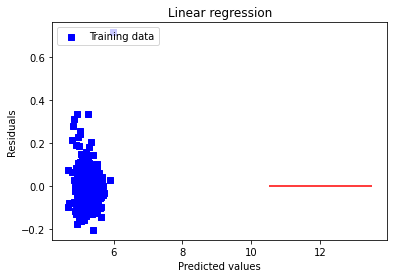

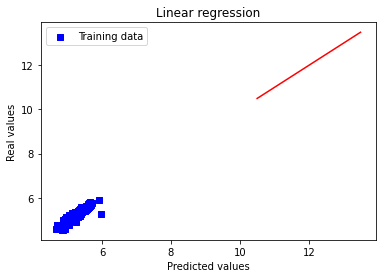

In [ ]:
from sklearn.linear_model import LinearRegression
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", mse_list)
# print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
# y_test_pred = lr.predict(X_test)

# # Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
# plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# # Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
# plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

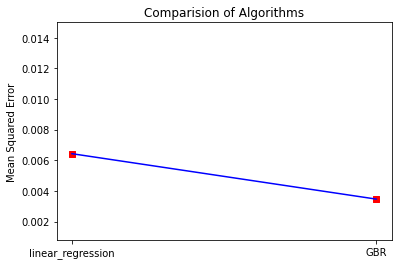

In [ ]:
# Plot Mean Squared Error

plt.plot(mse_list, c='b')
plt.title('Comparision of Algorithms')
plt.ylabel('Mean Squared Error')
plt.ylim(0.0008, 0.015)
x = np.array([0,1])
plt.scatter(x, mse_list, c='r', marker="s")
plt.xticks(x, methods)
plt.show()

In [ ]:
#Prediction with Test Data
#TODO: Now, we need to clean test data into the form our prediction model takes as input and predict the 'SalePrice' of the houses.

In [ ]:
print("Size of the test data: ", dfTest.shape)

Size of the test data:  (1459, 80)


In [ ]:
dfTest.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
dfTest.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [ ]:
# Let us see the columns that contain NaNs
def missing_values():
    temp_dict = dict()
    for i in dfTest.columns:
        if dfTest[i].isnull().sum() > 0: 
            temp_dict[i] = dfTest[i].isnull().sum()
    return temp_dict
            
# missing features and number of NaN in the features 

#missing_values()

# Few columns/decorations have more than 50% of the data points missing, we will discard those columns.
# uncomment the missing_values() functions called above to look them in detail.

In [ ]:
# Deleting the columns which has more than 50% of the missing values

def delete_columns(col):
    if dfTest[col].isnull().sum() > dfTest[col].count()/2:
        del dfTest[col]

for col in dfTest.columns:
    delete_columns(col)

# let us now look at the columns that still have missing values/NaNs
missing_values()

{'BsmtCond': 45,
 'BsmtExposure': 44,
 'BsmtFinSF1': 1,
 'BsmtFinSF2': 1,
 'BsmtFinType1': 42,
 'BsmtFinType2': 42,
 'BsmtFullBath': 2,
 'BsmtHalfBath': 2,
 'BsmtQual': 44,
 'BsmtUnfSF': 1,
 'Exterior1st': 1,
 'Exterior2nd': 1,
 'Functional': 2,
 'GarageArea': 1,
 'GarageCars': 1,
 'GarageCond': 78,
 'GarageFinish': 78,
 'GarageQual': 78,
 'GarageType': 76,
 'GarageYrBlt': 78,
 'KitchenQual': 1,
 'MSZoning': 4,
 'MasVnrArea': 15,
 'MasVnrType': 16,
 'SaleType': 1,
 'TotalBsmtSF': 1,
 'Utilities': 2}

In [ ]:
# This function predicts the LotFrontage of the missing data values using a Linear Regression model 
# Build a linear regression model with known LotArea and LotFrontage and predicts the LotFrontage for 
# the data with missing values

def fillna_lotfrontage(X_test, y_test):

    reg = linear_model.LinearRegression()
    reg.fit(X_test, y_test)
    
    return reg.coef_.tolist()[0], reg.intercept_ 

In [ ]:
X_test_list = dfTest['LotArea'].dropna()[:1000]
X_test = [[X_test_list[i]] for i in range(len(X_test_list))]
y_test = dfTest['LotFrontage'].dropna()[:1000]

w, intercept = fillna_lotfrontage(X_test, y_test)

for i in range(len(dfTest["LotFrontage"])):
    if pd.isnull(dfTest.loc[i, "LotFrontage"]):
        dfTest.loc[i, "LotFrontage"] = dfTest.loc[i, "LotArea"]*w + intercept

In [ ]:
# No NaN values in the LotFrontage column left
dfTest["LotFrontage"].isnull().sum()

0

In [ ]:
dfTest = pd.DataFrame(dfTest)
dfTest.head(n=5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal


In [ ]:
# Let us see the distribution of "MasVnrType" in the data
dfTest["MasVnrType"].describe()

count     1443
unique       4
top       None
freq       878
Name: MasVnrType, dtype: object

In [ ]:
for i in range(len(dfTest["MasVnrType"])):  
    if pd.isnull(dfTest.loc[i, "MasVnrType"]) and pd.isnull(dfTest.loc[i, "MasVnrArea"]):
        dfTest.loc[i, "MasVnrType"] = "None"
        dfTest.loc[i, "MasVnrArea"] = 0
        
# NaNs values in both MasVnrType and MasVnrArea are now removed
dfTest["MasVnrType"].isnull().sum(), dfTest["MasVnrArea"].isnull().sum()

(1, 0)

In [ ]:
# Let us see the type distribution.
dfTest["BsmtQual"].describe()
# it seems "TA" repeats most for alomost fifty percent of the data
#  there are four possible options

count     1415
unique       4
top         TA
freq       634
Name: BsmtQual, dtype: object

In [ ]:
# List of the 'BsmtQual' types (four types from the above boxplot)

pd.DataFrame(dfTest["BsmtQual"].unique()).dropna()[0].tolist()

['TA', 'Gd', 'Ex', 'Fa']

In [ ]:
dfTest = pd.DataFrame(dfTest)
dfTest.head(n=5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal


In [ ]:
# The other columns related with BsmtQual don't have much clear impact on the SalePrice
# Taking the most important variable on the category into consideration, we drop the other
# related columns: 'BsmtExposure',  'BsmtFinType1', 'BsmtFinType2', 'BsmtCond'.

delete_columns = ['BsmtExposure',  'BsmtFinType1', 'BsmtFinType2', 'BsmtCond']
for col in delete_columns:
    del dfTest[col]

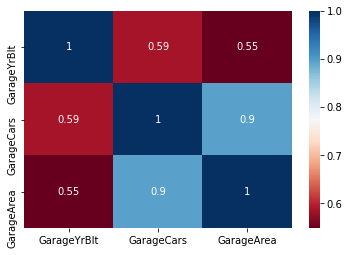

In [ ]:
garage_columns = ['GarageType', 'GarageYrBlt', 'GarageFinish','GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',]
# Let us plot heatplot diagrams to see the correlation of the above variables on the SalePrice
sns.heatmap(dfTest[garage_columns].corr(), annot=True, cmap="RdBu")

In [ ]:
# Since GarageCars doesn't have any missing values(NaN), we don't have to replace any NaN values here.
# We simply delete the columns that are not important and will not consider ahead for further study.

# garage_columns.remove('GarageCars')
# garage_columns.remove('SalePrice')
for col in garage_columns:
    # deleting the columns except those two in the garage_columns list we consider 
    del dfTest[col]

In [ ]:
dfTest['Electrical'].unique()


array(['SBrkr', 'FuseA', 'FuseF', 'FuseP'], dtype=object)

In [ ]:
for i in range(len(dfTest['Electrical'])):
    if pd.isnull(dfTest.loc[i, 'Electrical']):
        # print(df_train.loc[i, 'SalePrice'])
        # Checked the value of SalePrice corresponding to the missing Electrical value
        # and the missing value is imputed looking at the above graph
        dfTest.loc[i, 'Electrical'] = 'SBrkr'
# No NaN left in 'Electrical' column now
dfTest['Electrical'].isnull().sum()

0

In [ ]:
dfTest.columns, dfTest.columns.shape[0]


(Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
        'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtFinSF1',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
        'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
        'Functional', 'Fireplaces', 'GarageCars', 'PavedDrive', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
       dtype='o

In [ ]:
# separating categorical and numerical variables

variables_list = dfTest.columns.tolist()
numerical_vars = []
for col in variables_list:
    try:
        if float(dfTest[col][1]).is_integer():
            numerical_vars.append(col)
    except ValueError: pass

catergorical_vars = set(variables_list) - set(numerical_vars)
#catergorical_vars

# Let us see number of each type of columns/decorations
len(catergorical_vars), len(numerical_vars)

(30, 35)

<Figure size 1008x720 with 0 Axes>

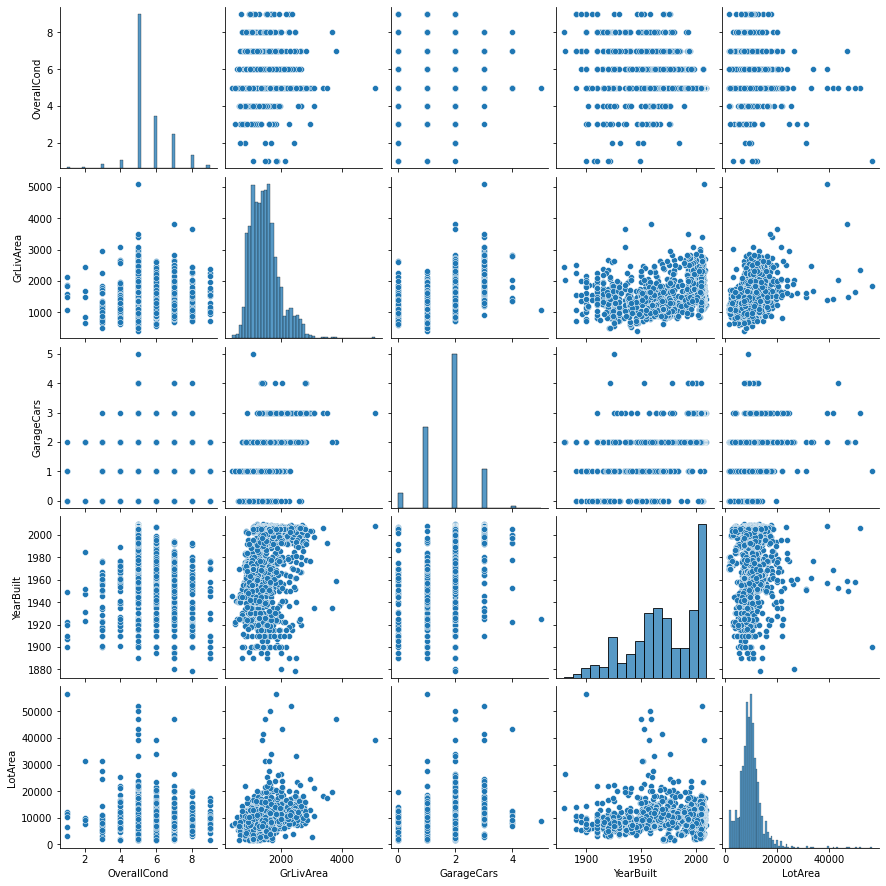

In [ ]:
interesting_cols = ["OverallCond", "GrLivArea", "GarageCars", "YearBuilt", "LotArea"]

plt.figure(figsize=(14,10))
sns.pairplot(dfTest[interesting_cols], dropna=True)
plt.show()
del interesting_cols

In [ ]:
correlation_matrix = dfTest.drop(["Id"], axis=1).corr()
#plt.figure(figsize=(12,8))
#sns.heatmap(corr_mat, square=False)
#del corr_mat

In [ ]:
correlation_matrix = dfTest.drop(["Id"], axis=1).corr()
#plt.figure(figsize=(12,8))
#sns.heatmap(corr_mat, square=False)
#del corr_mat

In [ ]:
# Let us find out the variable names that have high correlation with SalePrice
# We call these variables important variables.

# variables = correlation_matrix.columns
# important_variables = []
# for row in variables:
#     corrl = correlation_matrix.loc[row, 'SalePrice']
#     if corrl > 0.1:
#         important_variables.append(row)

# hp = correlation_matrix.loc[important_variables, important_variables]
# plt.figure("Heatmap-Important Variables", figsize=(12,8))
# # sns.heatmap(hp, annot=True, cbar=True)

# sns.heatmap(hp, cmap='Spectral_r', square=True, vmin=-.4, vmax=.7, linewidths=1,center= 0)

KeyError: ignored

In [ ]:
# deleting these columns from the dataframe
for col in ['TotRmsAbvGrd', 'BsmtFinSF1', 'BsmtUnfSF', 'ScreenPorch', 'HalfBath']:
    del dfTest[col]

In [ ]:
dfTest['LotArea'].shape[0]

1459

In [ ]:
# the four point's indices (we drop four rows with index names in following list)
drop_index_list = dfTest[dfTest['LotArea'] > 100000].index.tolist()
dfTest.drop(drop_index_list, inplace=True)
print("avoiding the above dataframe printing")

avoiding the above dataframe printing


In [ ]:
# creating list of the final numerical columns we are going to consider for the prediction model
num_vars_list = []
for var in num_variables:
    num_vars_list.append(var)

print("Total numerical columns we finally have is: ", len(num_vars_list))

Total numerical columns we finally have is:  30


In [ ]:
categorical_list = list()
for i in catergorical_vars:
    categorical_list.append(i)
# Let us see all the possible categories in all of the categorical variables
for col in categorical_list:
    print(col, ": ", dfTest[col].unique())

Exterior1st :  ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'AsphShn' nan 'CBlock']
CentralAir :  ['Y' 'N']
HeatingQC :  ['TA' 'Gd' 'Ex' 'Fa' 'Po']
Utilities :  ['AllPub' nan]
SaleCondition :  ['Normal' 'Partial' 'Abnorml' 'Family' 'Alloca' 'AdjLand']
KitchenQual :  ['TA' 'Gd' 'Ex' 'Fa' nan]
ExterCond :  ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Condition1 :  ['Feedr' 'Norm' 'PosN' 'RRNe' 'Artery' 'RRNn' 'PosA' 'RRAn' 'RRAe']
LotConfig :  ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']
Condition2 :  ['Norm' 'Feedr' 'PosA' 'PosN' 'Artery']
Street :  ['Pave' 'Grvl']
Foundation :  ['CBlock' 'PConc' 'BrkTil' 'Stone' 'Slab' 'Wood']
Heating :  ['GasA' 'GasW' 'Grav' 'Wall']
LandSlope :  ['Gtl' 'Mod' 'Sev']
Neighborhood :  ['NAmes' 'Gilbert' 'StoneBr' 'BrDale' 'NPkVill' 'NridgHt' 'Blmngtn'
 'NoRidge' 'Somerst' 'SawyerW' 'Sawyer' 'NWAmes' 'OldTown' 'BrkSide'
 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor' 'Blueste' 'IDOTRR'
 'Mitchel' 'Timber' 'Mead

In [ ]:
important_categorical_vars = ['KitchenQual', 'BsmtQual', 'Heating', 'ExterQual']

# Let us once again categories of these important variables
for col in important_categorical_vars:
    print(col, ": ", dfTest[col].unique())

KitchenQual :  ['TA' 'Gd' 'Ex' 'Fa' nan]
BsmtQual :  ['TA' 'Gd' 'Ex' 'Fa' nan]
Heating :  ['GasA' 'GasW' 'Grav' 'Wall']
ExterQual :  ['TA' 'Gd' 'Ex' 'Fa']


In [ ]:
# dataframe now contains only the numerical variables
all_vars_now = num_vars_list + important_categorical_vars
# The df_train ahead contains only these - all_vars_now variables
dfTest = dfTest[all_vars_now]

KeyError: ignored

In [ ]:
# This function takes in the categorical variables and introduces the numerical variable columns for 
# each of the categories for that categorical variables/columns/decorations in the original data
# For each of original categorical columns - will be added separate columns in df_frame for each of the categories
def numerical_columns(cat_var):
    # new DataFrame for the categorical variable cat_var
    df = pd.get_dummies(dfTest[cat_var], dummy_na=None)
    df_vars = df.columns
    modified_vars = [(cat_var + "-" + i) for i in df_vars]
    # new columns added in df_frame for each of the categories in cat_var
    for i in range(len(modified_vars)):
        dfTest[modified_vars[i]] = pd.Series(df[df_vars[i]]).tolist()
    # making the modified_vars list empty for next cat_var
    modified_vars = []

In [ ]:
# Calling numerical_columns function to intoduce new categorical columns as numerical values

for cat_var in important_categorical_vars:
    numerical_columns(cat_var)
# Run only once

In [ ]:
# Now deleting the original categorical form of the variables converted into the numerical form
for var in important_categorical_vars:
    del dfTest[var]

In [ ]:
# The dataframe we now have is ready to use in the regression model 
# we finally have 48 columns in the dataframe
dfTest.tail()
# Ready to build regression model now

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterCond,Foundation,BsmtFinSF2,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,BedroomAbvGr,KitchenAbvGr,Functional,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,KitchenQual-Ex,KitchenQual-Fa,KitchenQual-Gd,KitchenQual-TA,BsmtQual-Ex,BsmtQual-Fa,BsmtQual-Gd,BsmtQual-TA,Heating-GasA,Heating-GasW,Heating-Grav,Heating-Wall,ExterQual-Ex,ExterQual-Fa,ExterQual-Gd,ExterQual-TA
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,CBlock,0.0,546.0,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,3,1,Typ,0,0.0,Y,0,0,0,0,0,0,6,2006,WD,Normal,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,CBlock,0.0,546.0,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,3,1,Typ,0,1.0,Y,0,24,0,0,0,0,4,2006,WD,Abnorml,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,CBlock,0.0,1224.0,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,4,1,Typ,1,2.0,Y,474,0,0,0,0,0,9,2006,WD,Abnorml,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,PConc,0.0,912.0,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,3,1,Typ,0,0.0,Y,80,32,0,0,0,700,7,2006,WD,Normal,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1
1458,2919,60,RL,74.0,9627,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,PConc,0.0,996.0,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,3,1,Typ,1,3.0,Y,190,48,0,0,0,0,11,2006,WD,Normal,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1


In [ ]:
df = dfTest
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterCond', 'Foundation', 'BsmtFinSF2', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Functional', 'Fireplaces', 'GarageCars', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'KitchenQual-Ex', 'KitchenQual-Fa', 'KitchenQual-Gd', 'KitchenQual-TA',
       'BsmtQual-Ex', 'BsmtQual-Fa', 'BsmtQual-Gd', 'BsmtQual-TA',
       'Heating-Ga

In [ ]:
X_columns = df.columns.tolist()
Y_columns = dfTest.columns.tolist()


In [ ]:
# The input data for the regression models are:

X = df[X_columns]
Y = df[Y_columns]


In [ ]:
# The input data: dividing into train (75%) and validation data (25%)

x_train_len = round(X.shape[0]*0.75)
y_test_len = round(Y.shape[0]*0.75)
x_train = X[:x_train_len]
x_test = X[y_test_len:]
y_train = y[:x_train_len]
y_test = y[y_test_len:]

# print Test and Validation data lenght
print("Train data points: ", x_train_len)
print("Test data points: ", x_test.shape[0])


Train data points:  1094
Test data points:  365


In [ ]:
x_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterCond,Foundation,BsmtFinSF2,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,BedroomAbvGr,KitchenAbvGr,Functional,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,KitchenQual-Ex,KitchenQual-Fa,KitchenQual-Gd,KitchenQual-TA,BsmtQual-Ex,BsmtQual-Fa,BsmtQual-Gd,BsmtQual-TA,Heating-GasA,Heating-GasW,Heating-Grav,Heating-Wall,ExterQual-Ex,ExterQual-Fa,ExterQual-Gd,ExterQual-TA
1094,2555,40,RL,62.0,10042,Pave,Reg,Bnk,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,6,8,1920,1995,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,BrkTil,278.0,660.0,TA,Y,SBrkr,740,125,0,865,1.0,0.0,1,2,1,Typ,1,1.0,Y,0,0,84,0,0,0,8,2007,WD,Normal,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
1095,2556,20,RL,60.0,8172,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1955,1955,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,CBlock,0.0,768.0,TA,Y,SBrkr,768,0,0,768,0.0,0.0,1,2,1,Typ,1,1.0,Y,0,0,196,0,0,0,7,2007,WD,Normal,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
1096,2557,20,RL,60.0,8172,Pave,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1955,1955,Gable,CompShg,WdShing,Plywood,None,0.0,TA,CBlock,0.0,864.0,TA,Y,SBrkr,864,0,0,864,1.0,0.0,1,3,1,Typ,0,2.0,N,196,0,0,0,0,0,10,2007,COD,Family,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
1097,2558,90,RL,60.0,10890,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,Duplex,2Story,5,6,1923,1950,Hip,CompShg,Wd Sdng,Plywood,None,0.0,TA,PConc,0.0,1296.0,Fa,N,FuseA,1296,1296,0,2592,2.0,0.0,2,6,2,Min2,0,0.0,Y,0,742,240,0,0,1512,1,2007,WD,AdjLand,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
1098,2559,30,RL,54.0,7223,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,5,5,1926,1950,Hip,CompShg,Stucco,Plywood,None,0.0,TA,PConc,0.0,1290.0,TA,Y,SBrkr,1422,0,0,1422,0.0,0.0,1,3,1,Typ,0,1.0,Y,0,0,64,0,0,0,4,2007,WD,Normal,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1


In [ ]:
class Models(object):
    
    global seed 
    seed = 34234
    
    # Initialization 
    def __init__(self,x_train, x_test, y_train, y_test):
        # changing input as dataframe to list
        self.x_train = [x_train.iloc[i].tolist() for i in range(len(x_train))]
        self.x_test = [x_test.iloc[i].tolist() for i in range(len(x_test))]
        self.y_train = y_train.tolist()
        self.y_test = y_test.tolist()
    
    
    @staticmethod
    def print_info(cross_val_scores, mse):
        print("Cross Validation Scores: ", cross_val_scores)
        print("Mean Squared Error: ", mse)
        
        
    # Linear Regression 
    def linear_regression(self, x_train, x_test, y_train, y_test):
        reg = linear_model.LinearRegression()
        # X = np.array(X).reshape([-1, 1])
        reg.fit(self.x_train, self.y_train)
        y_pred_list = reg.predict(self.x_test)
        mse = mean_squared_error(self.y_test, y_pred_list)
        kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
        cross_val_scores = cross_val_score(reg, self.x_train, self.y_train, cv=kfold)
        print("\nLinear Regression Model")
        self.print_info(cross_val_scores, mse)
        return cross_val_scores, mse

In [ ]:
from types import FunctionType

methods = [x for x, y in Models.__dict__.items() if type(y) == FunctionType]
methods.remove('__init__')
# Now calling the all regression methods
cross_scores_list, mse_list = [], []
for model in methods:
    reg = Models(x_train, x_test, y_train, y_test)
    cross_val_scores, mse = getattr(reg, model)(x_train, x_test, y_train, y_test)
    cross_scores_list.append(cross_val_scores)
    mse_list.append(mse)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:755: FutureWarning:

Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).



ValueError: ignored

In [ ]:
missing_values()

{'BsmtFinSF2': 1,
 'BsmtFullBath': 2,
 'BsmtHalfBath': 2,
 'Exterior1st': 1,
 'Exterior2nd': 1,
 'Functional': 2,
 'GarageCars': 1,
 'MSZoning': 4,
 'MasVnrType': 1,
 'SaleType': 1,
 'TotalBsmtSF': 1,
 'Utilities': 2}